##**Introduction**##

Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital was troubled because of the childbed fever. A deadly disease affecting women that just have given birth. In the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth died from it. Dr. Ignaz Semmelweis knew the cause of childbed fever, It was the contaminated hands of the doctors delivering the babies.

In this analysis project, I am going to reanalyze the data that made Dr. Ignaz Semmelweis discover the importance of handwashing. Let's start by looking at the data that made Dr. Ignaz Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.

In [1]:
import pandas as pd

yearly= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yearly_deaths_by_clinic.csv')

print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. Notice that giving birth was very dangerous; an alarming number of women died during childbirth, most of them from childbed fever.

We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths in both Clinics.

In [10]:
yearly['ratio_of_deaths']=round(100*yearly['deaths']/yearly['births'],2)

print(yearly)

    year  births  deaths    clinic  ratio_of_deaths
0   1841    3036     237  clinic 1             7.81
1   1842    3287     518  clinic 1            15.76
2   1843    3060     274  clinic 1             8.95
3   1844    3157     260  clinic 1             8.24
4   1845    3492     241  clinic 1             6.90
5   1846    4010     459  clinic 1            11.45
6   1841    2442      86  clinic 2             3.52
7   1842    2659     202  clinic 2             7.60
8   1843    2739     164  clinic 2             5.99
9   1844    2956      68  clinic 2             2.30
10  1845    3241      66  clinic 2             2.04
11  1846    3754     105  clinic 2             2.80


Let's visualise the ratio of deaths in clinic 1 and clinic 2 separately now.

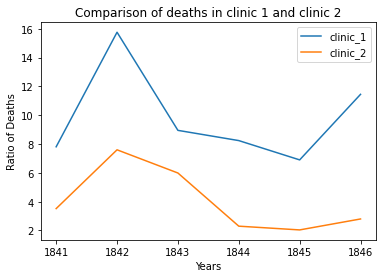

In [16]:
from matplotlib import pyplot as plt

clinic_1=yearly[:6]
clinic_2=yearly[6:]

plt.plot(clinic_1['year'], clinic_1['ratio_of_deaths'], label='clinic_1')
plt.plot(clinic_2['year'], clinic_2['ratio_of_deaths'], label='clinic_2')

plt.xlabel('Years')
plt.ylabel('Ratio of Deaths')
plt.title('Comparison of deaths in clinic 1 and clinic 2')
plt.legend()
plt.show()

We can see that the proportion of deaths is consistently so much higher in Clinic 1. Dr. Ignaz Semmelweis saw the same pattern. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Dr. Ignaz Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.

Now Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

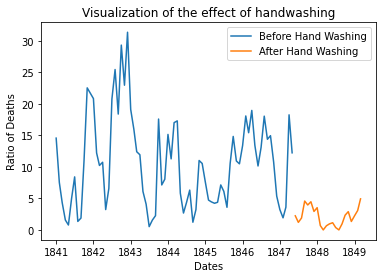

In [23]:
monthly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monthly_deaths.csv', parse_dates = ['date'])

monthly['ratio_of_deaths'] = round(100*monthly['deaths'] / monthly ['births'],2)

handwashing_date = pd.to_datetime('1847-06-01')

before_washing = monthly[monthly['date'] < handwashing_date]
after_washing = monthly[monthly['date'] >= handwashing_date]

plt.plot(before_washing['date'], before_washing['ratio_of_deaths'], label = 'Before Hand Washing')
plt.plot(after_washing['date'], after_washing['ratio_of_deaths'], label = 'After Hand Washing')

plt.xlabel('Dates')
plt.ylabel('Ratio of Deaths')
plt.title('Visualization of the effect of handwashing')
plt.legend()
plt.show()

Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Dr. Ignaz Semmelweis made handwashing obligatory.
The effect of handwashing is made even more clear with the highlighted graph above.

Now let's calculate the percentage of how effective handwashing was to reduce the number of deaths.

In [26]:
percent = round(before_washing['ratio_of_deaths'].mean() - after_washing['ratio_of_deaths'].mean(),2)

print(percent)

8.4


##**Conclusion**##

So handwashing reduced the ratio of deaths by by 8.4 percentage, according to the analysis done. All in all, it would seem that Dr. Ignaz Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Dr. Ignaz Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Dr. Ignaz Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor numerical evidences. If he would have had access to the analysis I've just put together he might have been more successful in proving his theory right.